## **FAKE PROFILE DETECTION IN SOCIAL PLATFORMS**

**Installing and Importing Required Pakages and Libraries**

In [6]:
#Installing the required pakages
!pip install pandas transformers torch torchvision sklearn


  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [7]:
#Importing the required Libraries
import os
import pandas as pd
import torch
from transformers import BertTokenizer
from torchvision import transforms
from sklearn.model_selection import train_test_split
import csv

**Preparing Data Input**

In [10]:
#Data Input
# === Step 1: Load Data ===

def read_csv_safely(filepath, delimiter=","):
    rows = []
    with open(filepath, 'r', encoding='latin1', errors='ignore') as file:
        reader = csv.reader(file, delimiter=delimiter)
        headers = next(reader)
        for row in reader:
            if len(row) == len(headers):
                rows.append(row)
            else:
                # Optionally log or skip malformed row
                continue
    return pd.DataFrame(rows, columns=headers)

def load_dataset(base_path):
    tweets_path = os.path.join(base_path, "tweets.csv")
    users_path = os.path.join(base_path, "users.csv")

    tweets_df = read_csv_safely(tweets_path)
    users_df = read_csv_safely(users_path)

    return tweets_df, users_df

# Load fake and genuine account data
tweets_fake, users_fake = load_dataset("/content/Fake_Accounts")
tweets_genuine, users_genuine = load_dataset("/content/Genuine_Accounts")

# Add label: 1 = fake, 0 = genuine
users_fake['label'] = 1
users_genuine['label'] = 0

# === Step 2: Merge tweets with user metadata ===

def merge_user_tweet(tweets_df, users_df):
    """Merge user and tweet information"""
    # Ensure common user_id format
    merged_df = pd.merge(tweets_df, users_df, left_on='user_id', right_on='id', suffixes=('_tweet', '_user'))
    return merged_df

merged_fake = merge_user_tweet(tweets_fake, users_fake)
merged_genuine = merge_user_tweet(tweets_genuine, users_genuine)

# Concatenate all records
full_df = pd.concat([merged_fake, merged_genuine], ignore_index=True)

In [11]:
# View the first 5 rows of the merged_fake DataFrame
print("Head of merged_fake DataFrame:")
merged_fake.head()

# View the first 5 rows of the merged_genuine DataFrame
print("\nHead of merged_genuine DataFrame:")
print(merged_genuine.head())


Head of merged_fake DataFrame:

Head of merged_genuine DataFrame:
             id_tweet                                               text  \
0  593932392663912449  RT @morningJewshow: Speaking about Jews and co...   
1  593895316719423488  This age/face recognition thing..no reason pla...   
2  593880638069018624  Only upside of the moment I can think of is th...   
3  593847955536252928  If you're going to think about+create experien...   
4  593847687847350272  Watching a thread on FB about possible future ...   

                                              source user_id truncated  \
0  <a href="http://tapbots.com/tweetbot" rel="nof...  678033             
1  <a href="http://twitter.com" rel="nofollow">Tw...  678033             
2  <a href="http://twitter.com" rel="nofollow">Tw...  678033             
3  <a href="http://tapbots.com/tweetbot" rel="nof...  678033             
4  <a href="http://tapbots.com/tweetbot" rel="nof...  678033             

  in_reply_to_status_id in_reply

**Dataset Description**

In [12]:
# View first few rows
print("First 5 records:")
print(full_df.head())

# Shape of the dataset
print("\nDataset shape (rows, columns):", full_df.shape)

# List column names
print("\nColumn names:")
print(full_df.columns.tolist())

# Data types and non-null counts
print("\nInfo summary:")
print(full_df.info())

# Count of null/missing values in each column
print("\nMissing values per column:")
print(full_df.isnull().sum())

# Check class distribution
print("\nClass distribution (0 = genuine, 1 = fake):")
print(full_df['label'].value_counts())

# Basic statistics of numerical columns
print("\nDescriptive statistics:")
print(full_df.describe(include='all'))

# Check for duplicate entries
print("\nNumber of duplicate rows:", full_df.duplicated().sum())

# Check unique values for categorical columns (example: 'screen_name', 'location', etc.)
print("\nUnique screen names:", full_df['screen_name'].nunique() if 'screen_name' in full_df.columns else "N/A")

First 5 records:
             id_tweet                                               text  \
0  532627591686275072   I Pooh - In silenzio 1968 http://t.co/ahvQxUqTws   
1  532624255058706432                             http://t.co/HyI5EQKz6Q   
2  532513524460052480  Tutti a tavola, con il filetto di baccalÃ . ht...   
3  532297646669852672                             http://t.co/NAHQ4l2pUy   
4  532295960807100416       Gold - Spandau Ballet http://t.co/o8ZJHt7Neu   

                                              source   user_id truncated  \
0  <a href="http://www.facebook.com/twitter" rel=...  24858289             
1  <a href="http://www.facebook.com/twitter" rel=...  24858289             
2  <a href="http://www.facebook.com/twitter" rel=...  24858289             
3  <a href="http://www.facebook.com/twitter" rel=...  24858289             
4  <a href="http://www.facebook.com/twitter" rel=...  24858289             

  in_reply_to_status_id in_reply_to_user_id in_reply_to_screen_name  

In [13]:
full_df['text'].head()

,text
0,I Pooh - In silenzio 1968 http://t.co/ahvQxUqTws
1,http://t.co/HyI5EQKz6Q
2,"Tutti a tavola, con il filetto di baccalÃ . ht..."
3,http://t.co/NAHQ4l2pUy
4,Gold - Spandau Ballet http://t.co/o8ZJHt7Neu


**Distribution of Fake and Genuine Accounts**

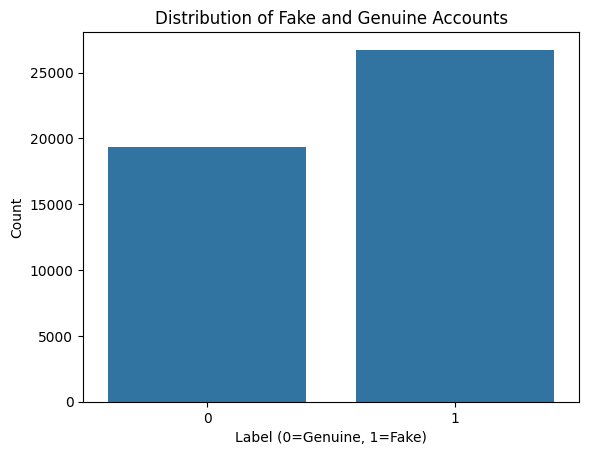

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot class distribution
sns.countplot(data=full_df, x='label')
plt.title("Distribution of Fake and Genuine Accounts")
plt.xlabel("Label (0=Genuine, 1=Fake)")
plt.ylabel("Count")
plt.show()


**Selecting Smaller Dataset for Traning BERT-ViT-PSO model**

In [15]:
import pandas as pd

# Sample 5,000 records randomly from each class
sampled_fake = merged_fake.sample(n=2000, random_state=42).reset_index(drop=True)
sampled_genuine = merged_genuine.sample(n=2000, random_state=42).reset_index(drop=True)

# Combine and shuffle
balanced_merged = pd.concat([sampled_fake, sampled_genuine]).sample(frac=1.0, random_state=42).reset_index(drop=True)

# Confirm the shape and label balance
print("Final balanced dataset shape:", balanced_merged.shape)
print("Label distribution:\n", balanced_merged['label'].value_counts())


Final balanced dataset shape: (4000, 68)
Label distribution:
 label
1    2000
0    2000
Name: count, dtype: int64


**Preparing Dataset for Vision Transformer Input**

In [16]:
import os
import pandas as pd
import requests
from tqdm import tqdm

# Assume 'balanced_merged' contains 5k fake + 5k genuine merged data
df = balanced_merged.copy()

# Image URL columns to process
image_columns = [
    'profile_image_url',
    'profile_banner_url',
]

# Create directory to save images
save_dir = "downloaded_images"
os.makedirs(save_dir, exist_ok=True)

# Function to download image and return local path
def download_image(url, save_path):
    try:
        response = requests.get(url, timeout=10)
        if response.status_code == 200:
            with open(save_path, 'wb') as f:
                f.write(response.content)
            return save_path
        else:
            return None
    except Exception:
        return None

# Download images for each column
for col in image_columns:
    local_path_col = col + "_local"
    df[local_path_col] = None  # Add new column for local image paths

    print(f"Processing column: {col}")
    for idx, url in tqdm(df[col].dropna().items(), total=df[col].notna().sum()):
        file_name = f"{col}_{idx}.jpg".replace("/", "_").replace(":", "_")
        file_path = os.path.join(save_dir, file_name)
        local_path = download_image(url, file_path)
        df.at[idx, local_path_col] = local_path

# Keep only necessary columns
columns_to_keep = ['text', 'label'] + [col + '_local' for col in image_columns]
cleaned_df = df[columns_to_keep].copy()

# Save to CSV
cleaned_df.to_csv("bert_vit_ready_10k.csv", index=False)
print("✅ Image downloading and dataset preparation completed for 10K samples.")


Processing column: profile_image_url


100%|██████████| 4000/4000 [03:45<00:00, 17.75it/s]


Processing column: profile_banner_url


100%|██████████| 4000/4000 [04:36<00:00, 14.45it/s]

✅ Image downloading and dataset preparation completed for 10K samples.


In [17]:
cleaned_df

,text,label,profile_image_url_local,profile_banner_url_local
0,Sii te stesso. Tutti gli altri sono giÃ occup...,1,None,None
1,@zigziggityzoo oh thatâll be AWESOME!!!,0,downloaded_images/profile_image_url_1.jpg,downloaded_images/profile_banner_url_1.jpg
2,@Nikov12 socio! Eta mielda se retraso! :S,1,downloaded_images/profile_image_url_2.jpg,None
3,@lenawash You are french. Everything is cheese...,0,downloaded_images/profile_image_url_3.jpg,downloaded_images/profile_banner_url_3.jpg
4,RT @MaggieMovie: What a guy @Schwarzenegger to...,0,None,None
...,...,...,...,...
3995,RT @Alf_MicStar: Hazte pipÃ­ en la reforma fis...,1,downloaded_images/profile_image_url_3995.jpg,None
3996,"Caminito al hostal nos besamos en cada farola,...",1,downloaded_images/profile_image_url_3996.jpg,None
3997,Alle volte bisogna alzare il volume della musi...,1,None,downloaded_images/profile_banner_url_3997.jpg
3998,@feliciafied it soundsâ¦*young* to me. in a b...,0,None,None


**Model Training and Evaluation**

In [18]:
!pip install transformers torchvision torch pandas scikit-learn deap tqdm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 100.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 22.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 42.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 90.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.6/135.6 kB 10.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstal

**Input Data to model for Training**

In [19]:
import pandas as pd

df = pd.read_csv("/content/bert_vit_ready_10k.csv")
df.dropna(subset=['profile_image_url_local'], inplace=True)
df['label'] = df['label'].astype(int)
print(df[['text', 'label', 'profile_image_url_local']].head())


                                                text  label  \
1          @zigziggityzoo oh thatâll be AWESOME!!!      0   
2          @Nikov12 socio! Eta mielda se retraso! :S      1   
3  @lenawash You are french. Everything is cheese...      0   
6           Mastella a Matrix?Monnezza alla seconda!      1   
9  Sei come l'ultimo giro di carta igienica: mi t...      1   

                     profile_image_url_local  
1  downloaded_images/profile_image_url_1.jpg  
2  downloaded_images/profile_image_url_2.jpg  
3  downloaded_images/profile_image_url_3.jpg  
6  downloaded_images/profile_image_url_6.jpg  
9  downloaded_images/profile_image_url_9.jpg  


**Data Loaders**

In [20]:
import torch
from torch.utils.data import Dataset, DataLoader
from PIL import Image
from transformers import BertTokenizer
from torchvision import transforms

tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

image_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

class BERTViTDataset(Dataset):
    def __init__(self, df, tokenizer, transform):
        self.df = df
        self.tokenizer = tokenizer
        self.transform = transform

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        row = self.df.iloc[idx]
        text = str(row['text'])
        image_path = row['profile_image_url_local']
        label = row['label']

        tokens = self.tokenizer(text, truncation=True, padding='max_length', max_length=128, return_tensors='pt')


        image = Image.open(image_path).convert('RGB')
        if image.mode != 'RGB':
            image = image.convert('RGB')


        image = self.transform(image)

        return {
            'input_ids': tokens['input_ids'].squeeze(0),
            'attention_mask': tokens['attention_mask'].squeeze(0),
            'image': image,
            'label': torch.tensor(label, dtype=torch.long)
        }


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [21]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df, test_size=0.2, stratify=df['label'], random_state=42)

train_dataset = BERTViTDataset(train_df, tokenizer, image_transform)
test_dataset = BERTViTDataset(test_df, tokenizer, image_transform)

train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=8)


**BERT-ViT Model**

In [22]:
import torch.nn as nn
from transformers import BertModel
from torchvision import models

class BERTViTClassifier(nn.Module):
    def __init__(self, hidden_dim=128):
        super().__init__()
        self.bert = BertModel.from_pretrained("bert-base-uncased")
        self.vit = models.vit_b_16(pretrained=True)
        self.vit.heads = nn.Identity()
        self.classifier = nn.Sequential(
            nn.Linear(768 + 768, hidden_dim),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(hidden_dim, 2)
        )

    def forward(self, input_ids, attention_mask, image):
        text_out = self.bert(input_ids=input_ids, attention_mask=attention_mask).pooler_output
        image_out = self.vit(image)
        combined = torch.cat((text_out, image_out), dim=1)
        return self.classifier(combined)

In [23]:
from sklearn.metrics import accuracy_score

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


def evaluate_model(hidden_dim):
    hidden_dim = int(hidden_dim[0])
    model = BERTViTClassifier(hidden_dim).to(device)
    model.train()

    optimizer = torch.optim.Adam(model.parameters(), lr=1e-5)
    loss_fn = nn.CrossEntropyLoss()

    for batch in train_loader:
        optimizer.zero_grad()
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        image = batch['image'].to(device)
        label = batch['label'].to(device)

        output = model(input_ids, attention_mask, image)
        loss = loss_fn(output, label)
        loss.backward()
        optimizer.step()

    # Evaluation
    model.eval()
    all_preds, all_labels = [], []
    with torch.no_grad():
        for batch in test_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            image = batch['image'].to(device)
            label = batch['label'].to(device)

            output = model(input_ids, attention_mask, image)
            preds = torch.argmax(output, dim=1)

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(label.cpu().numpy())

    acc = accuracy_score(all_labels, all_preds)
    print(f"[PSO] Hidden Dim: {hidden_dim} | Accuracy: {acc:.4f}")
    return (acc,)


In [24]:
!pip install pyswarm

  Preparing metadata (setup.py) ... done
  Created wheel for pyswarm: filename=pyswarm-0.6-py3-none-any.whl size=4463 sha256=90f58979fcfe964194d548277854b39ecf506de8754cd8fa87a802e898757e11
  Stored in directory: /root/.cache/pip/wheels/bb/4f/ec/8970b83323e16aa95034da175454843947376614d6d5e9627f
Successfully built pyswarm


In [25]:
from pyswarm import pso

In [ ]:
# PSO bounds for hidden_dim
lb = [64]     # Lower bound
ub = [500]    # Upper bound

# Run PSO
best_params, best_score = pso(evaluate_model, lb, ub, swarmsize=5, maxiter=10)
print(f"Best hidden_dim: {int(best_params[0])} with accuracy: {1 - best_score[0]:.4f}")


Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ViT_B_16_Weights.IMAGENET1K_V1`. You can also use `weights=ViT_B_16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vit_b_16-c867db91.pth" to /root/.cache/torch/hub/checkpoints/vit_b_16-c867db91.pth
100%|██████████| 330M/330M [00:02<00:00, 124MB/s]


**Evaluation**

In [ ]:
import torch
import torch.nn as nn
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import joblib  # For saving model if needed

# Extract the best hidden_dim from PSO output
optimal_hidden_dim = int(best_params[0])
print(f"Retraining with optimal hidden_dim: {optimal_hidden_dim}")

# Reinitialize the model
final_model = BERTViTClassifier(optimal_hidden_dim).to(device)
final_model.train()

optimizer = torch.optim.Adam(final_model.parameters(), lr=1e-5)
loss_fn = nn.CrossEntropyLoss()

# Final training loop
for epoch in range(5):  # or more epochs
    total_loss = 0
    for batch in train_loader:
        optimizer.zero_grad()
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        image = batch['image'].to(device)
        label = batch['label'].to(device)

        output = final_model(input_ids, attention_mask, image)
        loss = loss_fn(output, label)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
    print(f"Epoch {epoch+1} | Loss: {total_loss:.4f}")

# Final evaluation
final_model.eval()
all_preds, all_labels = [], []

with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        image = batch['image'].to(device)
        label = batch['label'].to(device)

        output = final_model(input_ids, attention_mask, image)
        preds = torch.argmax(output, dim=1)

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(label.cpu().numpy())

# Metrics
acc = accuracy_score(all_labels, all_preds)
prec = precision_score(all_labels, all_preds, average='weighted', zero_division=0)
rec = recall_score(all_labels, all_preds, average='weighted', zero_division=0)
f1 = f1_score(all_labels, all_preds, average='weighted', zero_division=0)
cm = confusion_matrix(all_labels, all_preds)

print(f"\nFinal Evaluation:")
print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1 Score : {f1:.4f}")
print(f"Confusion Matrix:\n{cm}")

# Save model if needed
torch.save(final_model.state_dict(), "BERT_ViT_PSO_FinalModel.pth")
print("Model saved to BERT_ViT_PSO_FinalModel.pth")


**Baseline Model Traning and Comparison** (Classical ML Models (TF-IDF + RF, SVM, XGBoost)  and CNN and LSTM Models (Keras with Embeddings))

In [ ]:
#Data recheck
cleaned_df

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(cleaned_df['text'], cleaned_df['label'], test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# TF-IDF vectorization
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train).toarray()
X_test_tfidf = tfidf.transform(X_test).toarray()

# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train_tfidf, y_train)
print("RF:", classification_report(y_test, rf.predict(X_test_tfidf)))

# SVM
svm = SVC()
svm.fit(X_train_tfidf, y_train)
print("SVM:", classification_report(y_test, svm.predict(X_test_tfidf)))

# XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train_tfidf, y_train)
print("XGBoost:", classification_report(y_test, xgb.predict(X_test_tfidf)))

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, LSTM, Dense, Dropout

# Tokenization
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Padding
max_len = 100
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

vocab_size = len(tokenizer.word_index) + 1

# CNN Model
cnn_model = Sequential([
    Embedding(vocab_size, 128, input_length=max_len),
    Conv1D(128, 5, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
cnn_model.fit(X_train_pad, y_train, epochs=5, batch_size=32, validation_data=(X_test_pad, y_test))
print("CNN:", cnn_model.evaluate(X_test_pad, y_test))

# LSTM Model
lstm_model = Sequential([
    Embedding(vocab_size, 128, input_length=max_len),
    LSTM(64),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
lstm_model.fit(X_train_pad, y_train, epochs=5, batch_size=32, validation_data=(X_test_pad, y_test))
print("LSTM:", lstm_model.evaluate(X_test_pad, y_test))
